In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split # for splitting data into Train and Test
from sklearn.metrics import accuracy_score
import seaborn as sb

In [2]:
dataset = pd.read_csv(r"D:\Applied AI\Datasets and DB\KNN\KNN- DemoDataset\3.concertriccir2.csv", sep = ',', names = ['dp1', 'dp2', 'label'])
dataset.head()

,dp1,dp2,label
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


In [3]:
# extracting all the datapoints in 'X' and the respective class_labels in 'y'
X = dataset.iloc[:,0:2].to_numpy()
y = dataset.iloc[:,-1].to_numpy()

In [4]:
# first dividing into test where test is 30% of X.
X_, X_test, y_, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [5]:
# creating training data and crossvalidation data
X_train, X_cv, y_train, y_cv = train_test_split(X_, y_, test_size = 0.3)


In [94]:
#finally we have three stages: Train, CV and Test

# print("Training data:\n",X_train)
# print("*"*40,"\n")
# print("Cross Validate data:\n",X_cv)
# print("*"*40,"\n")
# print("Test Data(unseen/futures datapoints):\n",X_test)

In [7]:
# Training the model on our training data
clf = KNeighborsClassifier(n_neighbors = 1, n_jobs = 6)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=6, n_neighbors=1, p=2,
                     weights='uniform')

In [8]:
Pr_cv = []
neigh = [x for x in range(1,47,2)]
for nn in neigh:
    clf = KNeighborsClassifier(n_neighbors = nn, n_jobs = 6)
    clf.fit(X_train, y_train)
    pred_on_cv = clf.predict(X_cv)
    prediction_accuracy = accuracy_score(y_cv, pred_on_cv) * float(100)
    print("Prediction Accuracy when {}-NN = {}%".format(nn, round(prediction_accuracy, 1)))
    Pr_cv.append(round(prediction_accuracy, 1))


Prediction Accuracy when 1-NN = 91.4%
Prediction Accuracy when 3-NN = 91.4%
Prediction Accuracy when 5-NN = 92.4%
Prediction Accuracy when 7-NN = 90.5%
Prediction Accuracy when 9-NN = 90.5%
Prediction Accuracy when 11-NN = 93.3%
Prediction Accuracy when 13-NN = 91.4%
Prediction Accuracy when 15-NN = 85.7%
Prediction Accuracy when 17-NN = 84.8%
Prediction Accuracy when 19-NN = 81.9%
Prediction Accuracy when 21-NN = 77.1%
Prediction Accuracy when 23-NN = 76.2%
Prediction Accuracy when 25-NN = 72.4%
Prediction Accuracy when 27-NN = 68.6%
Prediction Accuracy when 29-NN = 67.6%
Prediction Accuracy when 31-NN = 64.8%
Prediction Accuracy when 33-NN = 62.9%
Prediction Accuracy when 35-NN = 61.9%
Prediction Accuracy when 37-NN = 59.0%
Prediction Accuracy when 39-NN = 59.0%
Prediction Accuracy when 41-NN = 59.0%
Prediction Accuracy when 43-NN = 59.0%
Prediction Accuracy when 45-NN = 57.1%


In [100]:
# Maually calculating the accuracy of the prediction done 
clf1 = KNeighborsClassifier(n_neighbors = 1, n_jobs = 6)
clf1.fit(X_train, y_train)
pred_on_cv = clf1.predict(X_cv)
correct_prediction = list(y_cv == pred_on_cv).count(True)
prediction_accuracy = (correct_prediction/len(pred_on_cv))*100
prediction_accuracy

91.42857142857143

In [10]:
# Now finally running our model on unseen/future data i.e. X_Test
Pr_test = []
for nn in neigh:
    clf = KNeighborsClassifier(n_neighbors = nn, n_jobs = 6)
    clf.fit(X_train, y_train)
    pred_on_test = clf.predict(X_test)
    prediction_accuracy = accuracy_score(y_test, pred_on_test) * float(100)
    print("Prediction Accuracy when {}-NN = {}%".format(nn, round(prediction_accuracy, 1)))
    Pr_test.append(round(prediction_accuracy, 1))

Prediction Accuracy when 1-NN = 90.7%
Prediction Accuracy when 3-NN = 88.7%
Prediction Accuracy when 5-NN = 90.7%
Prediction Accuracy when 7-NN = 89.3%
Prediction Accuracy when 9-NN = 87.3%
Prediction Accuracy when 11-NN = 88.0%
Prediction Accuracy when 13-NN = 84.7%
Prediction Accuracy when 15-NN = 81.3%
Prediction Accuracy when 17-NN = 77.3%
Prediction Accuracy when 19-NN = 80.0%
Prediction Accuracy when 21-NN = 76.7%
Prediction Accuracy when 23-NN = 74.0%
Prediction Accuracy when 25-NN = 73.3%
Prediction Accuracy when 27-NN = 68.7%
Prediction Accuracy when 29-NN = 65.3%
Prediction Accuracy when 31-NN = 65.3%
Prediction Accuracy when 33-NN = 60.0%
Prediction Accuracy when 35-NN = 59.3%
Prediction Accuracy when 37-NN = 58.7%
Prediction Accuracy when 39-NN = 58.0%
Prediction Accuracy when 41-NN = 55.3%
Prediction Accuracy when 43-NN = 54.0%
Prediction Accuracy when 45-NN = 52.7%


### Plot to show how accuracy decreases as K value increases (CV data used)

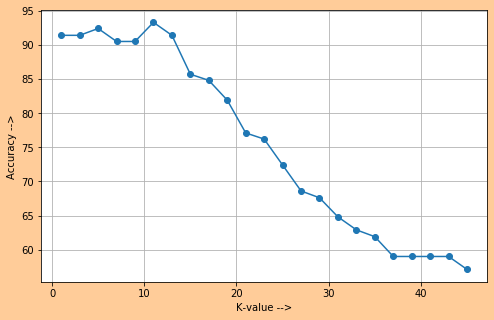

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5), facecolor= '#ffcc99')
plt.grid()
plt.plot(neigh, Pr_cv, "o-")
plt.xlabel("K-value -->")
plt.ylabel("Accuracy -->")
plt.show()

### Plot to show how accuracy decreases as K value increases (Test data used)

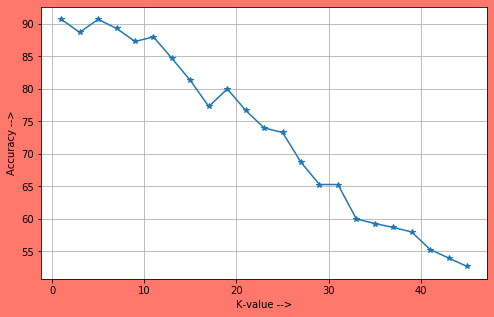

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5), facecolor= (1.0, 0.47, 0.42))
plt.grid()
plt.plot(neigh, Pr_test, "*-")
plt.xlabel("K-value -->")
plt.ylabel("Accuracy -->")
plt.show()

## Implementing K-Fold Cross Validation (K = 10)

In [13]:
from sklearn.model_selection import cross_val_score

In [21]:
AccuracyPerIteration = []
NearestNeigh = [i for i in range(1, 39, 2)]
for nn in NearestNeigh:
    knn_clf = KNeighborsClassifier(n_neighbors = nn, n_jobs = 6)
    z = cross_val_score(knn_clf, X_train, y_train, cv = 10, scoring = 'accuracy') # this method returns an array which contains all accuracies calculated for different folds.
    # scoring = 'accuracy': since we are in classification problem we are using this value. https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    
    AccuracyPerIteration.append(np.mean(z)) # here average of accuracies are taken for every iteration and stored in list.
    print("Accuracy when {} fold(s)= {}".format(nn, np.mean(z)))


Accuracy when 1 fold(s)= 0.8277463768115944
Accuracy when 3 fold(s)= 0.865108695652174
Accuracy when 5 fold(s)= 0.8369420289855073
Accuracy when 7 fold(s)= 0.827413043478261
Accuracy when 9 fold(s)= 0.803913043478261
Accuracy when 11 fold(s)= 0.8160942028985507
Accuracy when 13 fold(s)= 0.7994130434782609
Accuracy when 15 fold(s)= 0.783927536231884
Accuracy when 17 fold(s)= 0.7762753623188405
Accuracy when 19 fold(s)= 0.7394130434782608
Accuracy when 21 fold(s)= 0.7187318840579711
Accuracy when 23 fold(s)= 0.6987463768115941
Accuracy when 25 fold(s)= 0.690231884057971
Accuracy when 27 fold(s)= 0.6657173913043478
Accuracy when 29 fold(s)= 0.6578985507246378
Accuracy when 31 fold(s)= 0.6577318840579711
Accuracy when 33 fold(s)= 0.6495652173913044
Accuracy when 35 fold(s)= 0.6455652173913042
Accuracy when 37 fold(s)= 0.6413985507246377


In [92]:
# calculating the missclassification error.

mse = [1 - x for x in AccuracyPerIteration] # misclassification mean the incorrect prediction, which is 1- accuracy_at_some_Kvalue.
optimal_k = NearestNeigh[mse.index(min(mse))]# Where the missclassificaton error is lowest
print("K value where the misclassification error is lowers is: ",optimal_k)
print("Accuracy at K = {} is: {}%".format(optimal_k, AccuracyPerIteration[NearestNeigh.index(optimal_k)]*float(100)))

K value where the misclassification error is lowers is:  3
Accuracy at K = 3 is: 86.51086956521739%


### Now, lets create a plot against K value of nn and misclassification errors

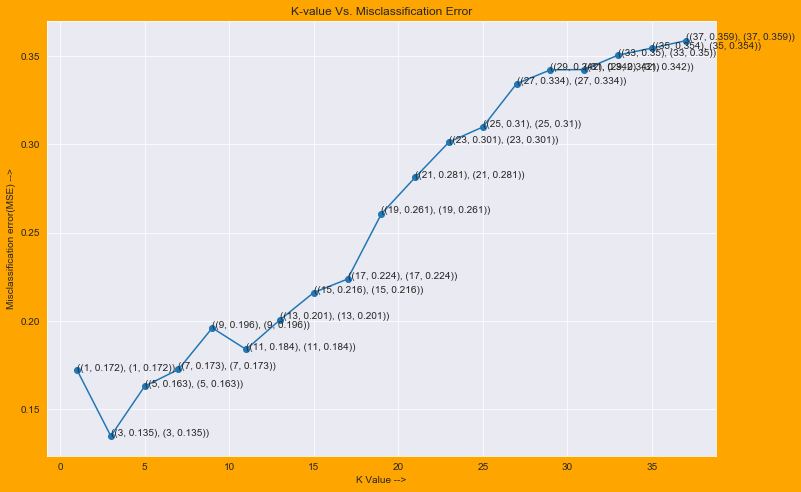

In [77]:
plt.figure(figsize = (12,8), facecolor= 'orange')
plt.grid(True)
plt.plot(NearestNeigh, mse, 'o-',)
plt.xlabel("K Value -->")
plt.ylabel("Misclassification error(MSE) -->")
plt.title("K-value Vs. Misclassification Error")

# for xy in zip(NearestNeigh, np.round(mse,3)):
#     plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')

for xy in zip(NearestNeigh, np.round(mse,3)):
    plt.annotate("({}, {})".format(xy, xy), xy = xy)

plt.show()

### Checking the accuracy now on Test (unseen) data now...

In [93]:
knn_clf = KNeighborsClassifier(n_neighbors = optimal_k, n_jobs = 6)
knn_clf.fit(X_train, y_train)
prediction_test = knn_clf.predict(X_test)
accuracy = accuracy_score(prediction_test, y_test,)
print(accuracy*float(100),"%")

88.66666666666667 %
